In [ ]:
!pip install gensim==3.8.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.4/23.4 MB 25.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for gensim: filename=gensim-3.8.3-cp39-cp39-linux_x86_64.whl size=26528075 sha256=606d8ca17ba3a385872eb53594c346aaac0d9e14a1bbd4617dbc8a4a374f1308
  Stored in directory: /root/.cache/pip/wheels/ca/5d/af/618594ec2f28608c1d6ee7d2b7e95a3e9b06551e3b80a491d6
Successfully built gensim
  Attempting uninstall: gensim
    Found existing installation: gensim 4.3.1
    Uninstalling gensim-4.3.1:
      Successfully uninstalled gensim-4.3.1


In [ ]:

import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
import re
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, LSTM, Embedding, Bidirectional
from bs4 import BeautifulSoup

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

from nltk.corpus import stopwords
from nltk.util import ngrams

from wordcloud import WordCloud

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from collections import defaultdict
from collections import Counter
plt.style.use('ggplot')
stop=set(stopwords.words('english'))

import re
from nltk.tokenize import word_tokenize
import gensim
import string

from tqdm import tqdm
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM,Dense, SpatialDropout1D, Dropout
from keras.initializers import Constant
from keras.optimizers import Adam

import warnings
warnings.simplefilter('ignore')


In [ ]:
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

In [ ]:
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
import re
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer() 

def preprocess(sentence):
    sentence=str(sentence)
    sentence = sentence.lower()
    sentence=sentence.replace('{html}',"") 
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url=re.sub(r'http\S+', '',cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)  
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]
    stem_words=[stemmer.stem(w) for w in filtered_words]
    lemma_words=[lemmatizer.lemmatize(w) for w in stem_words]
    return " ".join(filtered_words)

In [ ]:
df_train = pd.read_csv('train.txt', header =None, sep =';', names = ['Input','Sentiment'], encoding="utf-8")

df_test = pd.read_csv('test.txt', header = None, sep =';', names = ['Input','Sentiment'],encoding="utf-8")

df_val = pd.read_csv('val.txt', header=None, sep=';', names=['Input','Sentiment'], encoding="utf-8")

In [ ]:
df_val.head()

,Input,Sentiment
0,im feeling quite sad and sorry for myself but ...,sadness
1,i feel like i am still looking at a blank canv...,sadness
2,i feel like a faithful servant,love
3,i am just feeling cranky and blue,anger
4,i can have for a treat or if i am feeling festive,joy


In [ ]:
df_train.head()

,Input,Sentiment
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [ ]:
df_test.head()

,Input,Sentiment
0,im feeling rather rotten so im not very ambiti...,sadness
1,im updating my blog because i feel shitty,sadness
2,i never make her separate from me because i do...,sadness
3,i left with my bouquet of red and yellow tulip...,joy
4,i was feeling a little vain when i did this one,sadness


In [ ]:
df_train['Sentiment'].unique()

array(['sadness', 'anger', 'love', 'surprise', 'fear', 'joy'],
      dtype=object)

In [ ]:
df_train.size

32000

In [ ]:
df_train[df_train['Sentiment']=='surprise']

,Input,Sentiment
6,ive been taking or milligrams or times recomme...,surprise
32,i have seen heard and read over the past coupl...,surprise
57,i keep feeling pleasantly surprised at his sup...,surprise
64,i am now nearly finished the week detox and i ...,surprise
129,i too feel as if i am a stranger in a strange ...,surprise
...,...,...
15871,i spent a lot of time feeling a bit stunned th...,surprise
15943,i believe the most readers feel impressed by t...,surprise
15970,i have to admit im feeling pretty overwhelmed,surprise
15974,i am feeling much like the guy in the pic abov...,surprise


In [ ]:
df_train = df_train.drop(df_train[df_train['Sentiment']=='surprise'].index)

In [ ]:
df_train['Sentiment'].unique()

array(['sadness', 'anger', 'love', 'fear', 'joy'], dtype=object)

In [ ]:
df_test = df_test.drop(df_test[df_test['Sentiment']=='surprise'].index)

In [ ]:
df_test['Sentiment'].unique()

array(['sadness', 'joy', 'fear', 'anger', 'love'], dtype=object)

In [ ]:
df_val = df_val.drop(df_val[df_val['Sentiment']=='surprise'].index)

In [ ]:
df_val['Sentiment'].unique()

array(['sadness', 'love', 'anger', 'joy', 'fear'], dtype=object)

In [ ]:
df_train_pre = pd.DataFrame(columns=['Input', 'Sentiment'])
df_test_pre = pd.DataFrame(columns=['Input', 'Sentiment'])


In [ ]:
df_train_pre['Input']=df_train['Input'].map(lambda s:preprocess(s)) 
df_test_pre['Input']=df_test['Input'].map(lambda s:preprocess(s)) 


In [ ]:
df_train_pre['Sentiment'] = df_train['Sentiment']
df_test_pre['Sentiment'] = df_test['Sentiment']


In [ ]:
colors = np.array(["gray", 'orangered', 'hotpink', 'gold', 'cornflowerblue'])

plt.bar(y_train.unique(),height=y_train.value_counts(), color=colors)
plt.title("Training data - classes counts")
plt.show()

In [ ]:
df_train_pre['Sentiment'] = df_train_pre.Sentiment.replace({'joy':0,'anger':1,'love':2,'sadness':3,'fear':4,'surprise':5})
df_test_pre['Sentiment'] = df_test_pre.Sentiment.replace({'joy':0,'anger':1,'love':2,'sadness':3,'fear':4,'surprise':5})
df_val['Sentiment'] = df_val.Sentiment.replace({'joy':0,'anger':1,'love':2,'sadness':3,'fear':4,'surprise':5})

In [ ]:
from keras.utils import to_categorical
y_train = to_categorical(df_train_pre.Sentiment.values)
y_test = to_categorical(df_test_pre.Sentiment.values)
y_val = to_categorical(df_val.Sentiment.values)

In [ ]:
from keras.preprocessing.text import Tokenizer 
num_words = 10000 
tokenizer=Tokenizer(num_words,lower=True)
df_total = pd.concat([df_train_pre['Input'], df_test.Input], axis = 0)
tokenizer.fit_on_texts(df_total)

In [ ]:
X_train=tokenizer.texts_to_sequences(df_train_pre['Input'])
X_train_pad=pad_sequences(X_train,maxlen=300,padding='post')  
X_test = tokenizer.texts_to_sequences(df_test_pre.Input)
X_test_pad = pad_sequences(X_test, maxlen = 300, padding = 'post')
X_val = tokenizer.texts_to_sequences(df_val.Input)
X_val_pad = pad_sequences(X_val, maxlen = 300, padding = 'post')

In [ ]:
import gensim.downloader as api
glove_gensim  = api.load('glove-wiki-gigaword-100')

[==================================================] 100.0% 128.1/128.1MB downloaded


In [ ]:
vector_size = 100
gensim_weight_matrix = np.zeros((num_words ,vector_size))
gensim_weight_matrix.shape

(10000, 100)

In [ ]:
for word, index in tokenizer.word_index.items():
    if index < num_words: # since index starts with zero 
        if word in glove_gensim.vocab:
            gensim_weight_matrix[index] = glove_gensim[word]
        else:
            gensim_weight_matrix[index] = np.zeros(100)

In [ ]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, LSTM, Embedding,Bidirectional
import tensorflow
from tensorflow.compat.v1.keras.layers import CuDNNLSTM
from tensorflow.keras.layers import Dropout, LeakyReLU, Flatten

In [ ]:
from keras.layers.normalization.batch_normalization_v1 import BatchNormalization
EMBEDDING_DIM = 100
class_num = 5
model = Sequential()
model.add(Embedding(input_dim = num_words,
 output_dim = EMBEDDING_DIM,
 input_length= X_train_pad.shape[1],
 weights = [gensim_weight_matrix],trainable = False))
model.add(Dropout(0.2))
model.add(LeakyReLU(0.3))
model.add(Bidirectional(CuDNNLSTM(64,return_sequences=True)))
model.add(Dropout(0.2))
model.add(Bidirectional(CuDNNLSTM(128,return_sequences=True)))
model.add(Dropout(0.2))
model.add(LeakyReLU(0.3))
model.add(Bidirectional(CuDNNLSTM(64,return_sequences=True)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(32))
model.add(LeakyReLU())
model.add(Dropout(0.2))
model.add(Dense(class_num, activation ='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam',metrics = 'accuracy')

In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 300, 100)          1000000   
                                                                 
 dropout (Dropout)           (None, 300, 100)          0         
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 300, 100)          0         
                                                                 
 bidirectional (Bidirectiona  (None, 300, 128)         84992     
 l)                                                              
                                                                 
 dropout_1 (Dropout)         (None, 300, 128)          0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 300, 256)         264192    
 nal)                                                   

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 5)
mc = ModelCheckpoint('./model.h5', monitor = 'val_accuracy', mode = 'max', verbose = 1, save_best_only = True)

In [ ]:
history_embedding = model.fit(X_train_pad, y_train, 
                                epochs = 25, batch_size = 100, 
                                validation_data=(X_val_pad, y_val),
                                verbose = 1, callbacks= [es, mc])

Epoch 1/25
155/155 [==============================] - ETA: 0s - loss: 1.2689 - accuracy: 0.4944
Epoch 1: val_accuracy improved from -inf to 0.56175, saving model to ./model.h5
155/155 [==============================] - 27s 99ms/step - loss: 1.2689 - accuracy: 0.4944 - val_loss: 1.1307 - val_accuracy: 0.5618
Epoch 2/25
155/155 [==============================] - ETA: 0s - loss: 0.9930 - accuracy: 0.6184
Epoch 2: val_accuracy improved from 0.56175 to 0.61542, saving model to ./model.h5
155/155 [==============================] - 14s 89ms/step - loss: 0.9930 - accuracy: 0.6184 - val_loss: 0.9619 - val_accuracy: 0.6154
Epoch 3/25
155/155 [==============================] - ETA: 0s - loss: 0.7837 - accuracy: 0.7030
Epoch 3: val_accuracy improved from 0.61542 to 0.74935, saving model to ./model.h5
155/155 [==============================] - 14s 89ms/step - loss: 0.7837 - accuracy: 0.7030 - val_loss: 0.6797 - val_accuracy: 0.7493
Epoch 4/25
155/155 [==============================] - ETA: 0s - los

In [ ]:
y_pred = np.argmax(model.predict(X_test_pad), axis  =  1)
y_true = np.argmax(y_test, axis = 1)
from sklearn import metrics
print(metrics.classification_report(y_pred, y_true))

61/61 [==============================] - 3s 29ms/step
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       638
           1       0.95      0.91      0.93       287
           2       0.97      0.75      0.84       206
           3       0.96      0.95      0.96       588
           4       0.93      0.97      0.95       215

    accuracy                           0.94      1934
   macro avg       0.94      0.91      0.92      1934
weighted avg       0.94      0.94      0.93      1934



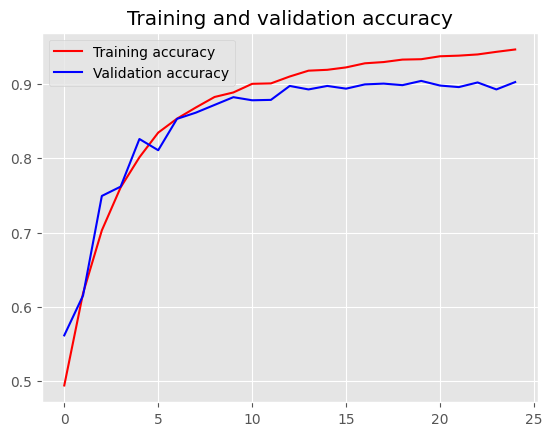

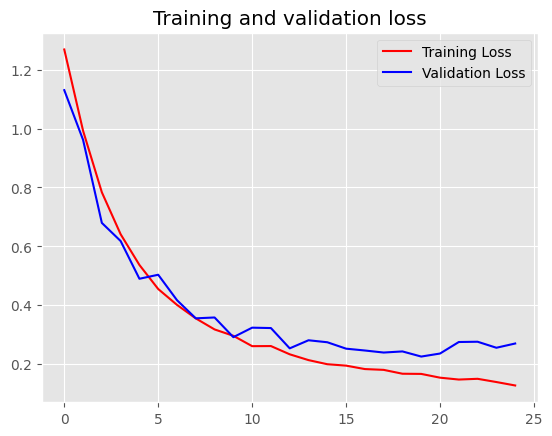

In [ ]:

%matplotlib inline
import matplotlib.pyplot as plt
acc = history_embedding.history['accuracy']
val_acc = history_embedding.history['val_accuracy']
loss = history_embedding.history['loss']
val_loss = history_embedding.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


In [ ]:
X = str("I have been thinking about going to a beach. I enjoy listening to music and singing .Chilling with friends, playing pubg. Getting an internship in summer, applying for companies.Yes I have been getting decent sleep.")

In [ ]:
def result(X):
  in_pre = preprocess(X)
  in_tok = tokenizer.texts_to_sequences(in_pre)
  in_pad = pad_sequences(in_tok, maxlen = 300, padding = 'post')
  return max(np.argmax(model.predict(in_pad, verbose = 0), axis=1))

In [ ]:
res = result(X)

In [ ]:
res

4